# Real World Examples

```{contents}
:local:
```

[Tim's reply on my confusion](https://stats.stackexchange.com/questions/593079/interpretation-of-bernoulli-and-binomial-random-variables-in-a-call-simulation-c).

## Utilities

In [73]:
import sys
from pathlib import Path
parent_dir = str(Path().resolve().parents[3])
sys.path.append(parent_dir)

import random
import warnings

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

from omnivault.utils.reproducibility.seed import seed_all

def true_pmf(x: float, population: np.ndarray) -> float:
    r"""PMF of the true population: map X(\S) to a probability.

    Note:
        The PMF is completely determined if we know the true distribution.
    """
    return np.sum(population == x) / len(population)


def empirical_pmf(x: float, sample: np.ndarray) -> float:
    """Empirical distribution of the sample."""
    return np.sum(sample == x) / len(sample)

In [74]:
_ = seed_all(42, set_torch_deterministic=False)

Using Seed Number 42


## Call Center Simulation

This example is taken from {cite}`yiu_2019`, please take a look at this author's articles, they are really good!

Imagine that we are data scientists tasked with improving the ROI (Return on Investment) of our company's call center, 
where employees attempt to cold call potential customers and get them to purchase our product.

You look at some historical data and find the following:

- The typical call center employee completes on average 50 calls per day.
- The probability of a conversion (purchase) for each call is $4\%$.
- The average revenue to your company for each conversion is $90$.
- The call center you are analyzing has $100$ employees.
- Each employee is paid $200$ per day of work.

### Bernoulli Trials

Let $X$ be the ***success conversion call status*** of a ***call made by 1 single randomly chosen employee***.
In other words, let $X$ be the ***outcome of a call*** made by ***1 single randomly chosen employee***
where the outcome is either success or failure in conversion.

Then we can model the ***probability of success*** of a call made by a ***randomly chosen employee*** as 
a Bernoulli random variable $X$ with parameter $p$ where $p$ is the ***probability of success***
of a call made by that ***randomly chosen employee***.

We need to follow some assumptions in order to make $X$ a Bernoulli Trial:

- Each trial has two possible outcomes: 1 or 0 (success of failure);
    - This means any single employee can only make call that is successful or not.
- The probability of success is constant for each trial, as mentioned,
the probability of a conversion (purchase) for each call is $p=0.04$. We treat is as constant.
    - This means everytime a call is made by a randomly chosen employee, the success rate is constant at $p=0.04$.
- Each trial is independent.
    - This means that each call made by the randomly chosen employee is independent of the previous calls made.

We define the sample space, event space and probability measure below:

- The sample space $\S = \{0,1\}$ where $0$ represents ***failure*** and $1$ represents ***success***.
- The event space $\E = \{\emptyset, \{0\}, \{1\}, \{0,1\}\}$.
- The probability measure $\P$ is defined as follows:
    - $\P(\emptyset) = 0$
    - $\P(\{0\}) = 1-p = 0.96$
    - $\P(\{1\}) = p = 0.04$
    - $\P(\{0,1\}) = 1$
    
Our random variable $X: \S \to \R$ can be defined as $X(\{0\}) = 0$ and $X(\{1\}) = 1$, 
or $X(0) = 0$ and $X(1) = 1$. The states of $X$ are $\lset 0, 1 \rset$.

Consequently, the PMF is fully determined by
  
$$
\begin{align}
f_X(x) = \P(X=x) = \begin{cases}
    0.96  & \text{if } x = 0 \\
    0.04  & \text{if } x = 1
\end{cases}
\end{align}
$$

$X$ is a Bernoulli Trial because we can think of it as 1 single person tossing 1 coin, then the corresponding
random variable $X$ is **the outcome of the coin toss made by 1 randomly chosen single person.** Therefore,
it can be made to fit as a Bernoulli Trial if we assume the assumptions as above.

### Binomial Distribution

Now the above details a ***single call*** made by a ***randomly chosen employee***, which follows a Bernoulli distribution.
You can associate this with a ***single coin toss*** made by a ***randomly chosen person***, which also follows a Bernoulli distribution 
(i.e. $X \sim \bern(0.04)$).

Now, a single employee can make multiple calls. For example, in the example above, an employee can make
50 calls a day. We can define a sequence of calls $X_1, X_2, \ldots, X_{50}$.
One confusion that arise here is what each $X_i$ mean. In this particular settings,
it would be reasonable to assume that each $X_i$ is a copy of $X$ where $X$ is ***the*** randomly
chosen person. This means once $X$ is determined (tagged to the person chosen, say person A), then
$X_1, X_2, \ldots, X_{50}$ all refer to this person A's calls as it does not make sense
that $X_i$ correspond to different person. See [here](https://stats.libretexts.org/Bookshelves/Probability_Theory/Probability_Mathematical_Statistics_and_Stochastic_Processes_(Siegrist)/11%3A_Bernoulli_Trials/11.01%3A_Introduction_to_Bernoulli_Trials)'s
example on "Suppose that a student takes a multiple choice test" to see how they phrase it. I think I should
rephrase the definition of my Bernoulli r.v. just now as the employee is not "random"?

Since each $X_i$ is a Bernoulli trial, then  $n$ such calls are **identically and independently distributed** (i.i.d.),
then we can define $Y$ to be the ***number of successful conversion calls***, which now follows a ***Binomial distribution*** because
each call made by the employee is $\iid$ and follows a Bernoulli distribution with constant parameter $p$.

Since $n=50$ and $p=0.04$, we can define our $Y$ as follows: 

$$
Y \sim \binomial(50, 0.04)
$$

So $Y = X_0 + X_1 + \ldots + X_{50}$ in this scenario, note $Y$ is still made by 1 single employee.
It is just the total number of successful conversion calls made by 1 single employee.

Each call by 1 single employee is $\iid$, this means it is similar idea to 1 single person tossing 1 coin 50 times.

Below is a realization of the PMF of $Y$:

$$
\begin{align}
\P(Y=y) = \begin{cases}
0.12988579352203838   &\quad \text{ if } y=0 \\
0.2705954031709139   &\quad \text{ if } y=1 \\
0.27623280740364115 &\quad \text{ if } y=2 \\
\vdots &\quad \vdots \\
1.2676506002282307e-70   &\quad \text{ if } y=50 \\
\end{cases}
\end{align}
$$

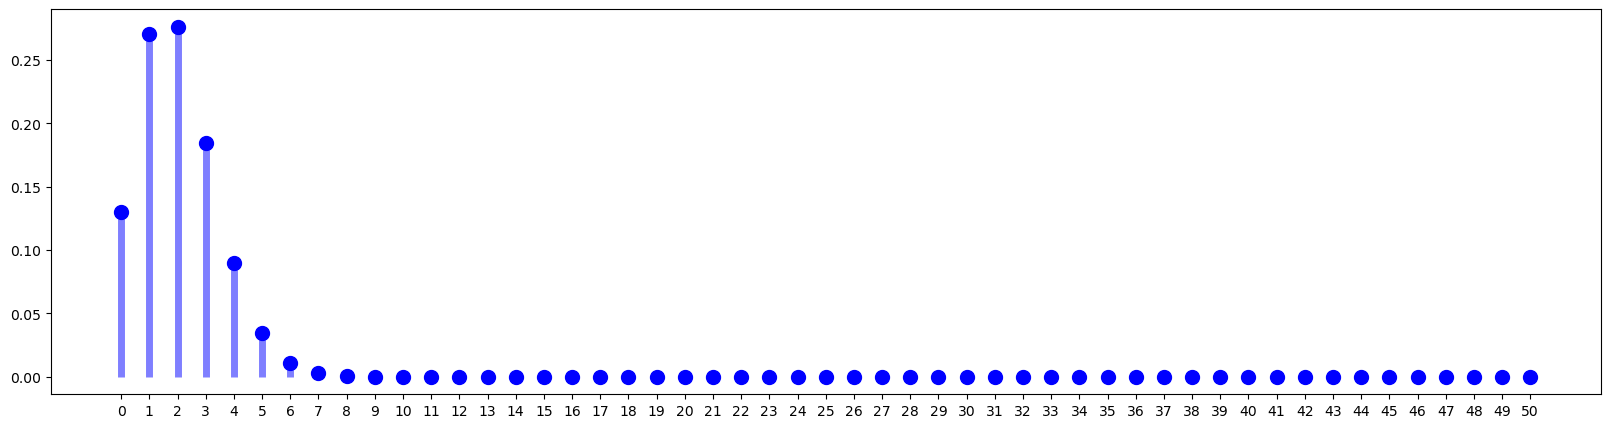

In [75]:
p = 0.04
n = 50

# our random variable Y
Y = stats.binom(n, p)

y = np.arange(n + 1)  # [0, 1, ..., 50]

f = Y.pmf(y)  # pmf P(Y=0) P(Y=1)

fig = plt.figure(figsize=(20, 5))
plt.plot(y, f, "bo", ms=10)
plt.vlines(y, 0, f, colors="b", lw=5, alpha=0.5)
plt.xticks(y)
plt.show();

In [76]:
for y_ in range(51):
    print(f"PMF for Y={y_} is {Y.pmf(y_)}")

PMF for Y=0 is 0.12988579352203838
PMF for Y=1 is 0.2705954031709139
PMF for Y=2 is 0.27623280740364115
PMF for Y=3 is 0.18415520493576068
PMF for Y=4 is 0.09015931908313288
PMF for Y=5 is 0.03456107231520094
PMF for Y=6 is 0.010800335098500296
PMF for Y=7 is 0.002828659192464365
PMF for Y=8 is 0.0006335017983123338
PMF for Y=9 is 0.00012318090522739773
PMF for Y=10 is 2.1043404643013807e-05
PMF for Y=11 is 3.1883946428808775e-06
PMF for Y=12 is 4.317617745567845e-07
PMF for Y=13 is 5.2586369978069964e-08
PMF for Y=14 is 5.790760979727912e-09
PMF for Y=15 is 5.790760979727948e-10
PMF for Y=16 is 5.278037351314524e-11
PMF for Y=17 is 4.398364459428767e-12
PMF for Y=18 is 3.3598617398414237e-13
PMF for Y=19 is 2.3577977121694196e-14
PMF for Y=20 is 1.5227443557760843e-15
PMF for Y=21 is 9.063954498667164e-17
PMF for Y=22 is 4.978308342070981e-18
PMF for Y=23 is 2.525228869166441e-19
PMF for Y=24 is 1.1837010324217706e-20
PMF for Y=25 is 5.129371140494332e-22
PMF for Y=26 is 2.05503651462

In [77]:
mean, var = Y.stats(moments="mv")
print(f"Expected value: {mean}")
print(f"Variance: {var}")

Expected value: 2.0
Variance: 1.92


At this very moment, we can already calculate our the total revenue earned per day 
and the corresponding profits per day.

This is because we can use the expected value $\P \lsq Y \rsq$
to get the average number of successful conversion per day.

We see that we are making a loss of $-2000$ a day.

In [78]:
num_employees = 100
salary_per_employee = 200
revenue_per_successful_call = 90

expected_total_conversions = mean * num_employees
expected_total_revenue     = revenue_per_successful_call * expected_total_conversions
expected_total_profits     = expected_total_revenue - salary_per_employee * num_employees

print(f"Expected Total Conversions Per Day: {expected_total_conversions}")
print(f"Expected Total Revenue Per Day: {expected_total_revenue}")
print(f"Expected Total Profits Per Day: {expected_total_profits}")

Expected Total Conversions Per Day: 200.0
Expected Total Revenue Per Day: 18000.0
Expected Total Profits Per Day: -2000.0


By theory, we know that increasing either $n$ or $p$ will increase the expectation
$\exp \lsq Y \rsq$ since $n$ and $p$ are both positive. Consequently, increasing both at the same 
time will also guarantee an increase in expectation.

So the solutions to increase revenue/profits per day are:

- Increase $n$, the number of calls performed by 1 single employee;
- Increase $p$, the success rate of a call conversion by 1 single employee through techniques like not hard pressing the customers to buy something;

With this realized state of the theoretical (true) PMF, we can employ **generative/synthesis** method to generate
samples from this distribution because **we assumed that $Y$ follows a Binomial distribution prior**.

So if we have `Y.rvs(size = 10)`, it simply means generate a sequence 10 random variables $Y_1, Y_2, \ldots, Y_{10}$ of $Y$. 

We have

$$
Y_i \sim \binomial(50, 0.04) \quad i \in \{0, 1, \ldots, 50\}
$$

In this context, we can be unambiguous and say that each $Y_i$ should be the ***number of successful conversion calls*** made by a single randomly selected employee.

To be more precise, each experiment for $Y_i$ is like a new randomly drawn 50 calls by a random person, so 
each time is a realisation of 50 calls from a randomly selected person. So if you have 100 people you can have 100 $Y_i$.
Note the distinction, in $X_i$, this $X_i$ is bind to a single person (may be wrong here), here each $Y_i$
can be any member from the population.

In [79]:
# generate states from binomial distribution
Y.rvs(size = 10)

array([1, 4, 3, 2, 1, 1, 0, 4, 2, 3], dtype=int64)

If we plot 100 such $Y_i$, we form an empirical distribution and compared to the true PMF it has a bit of differences.

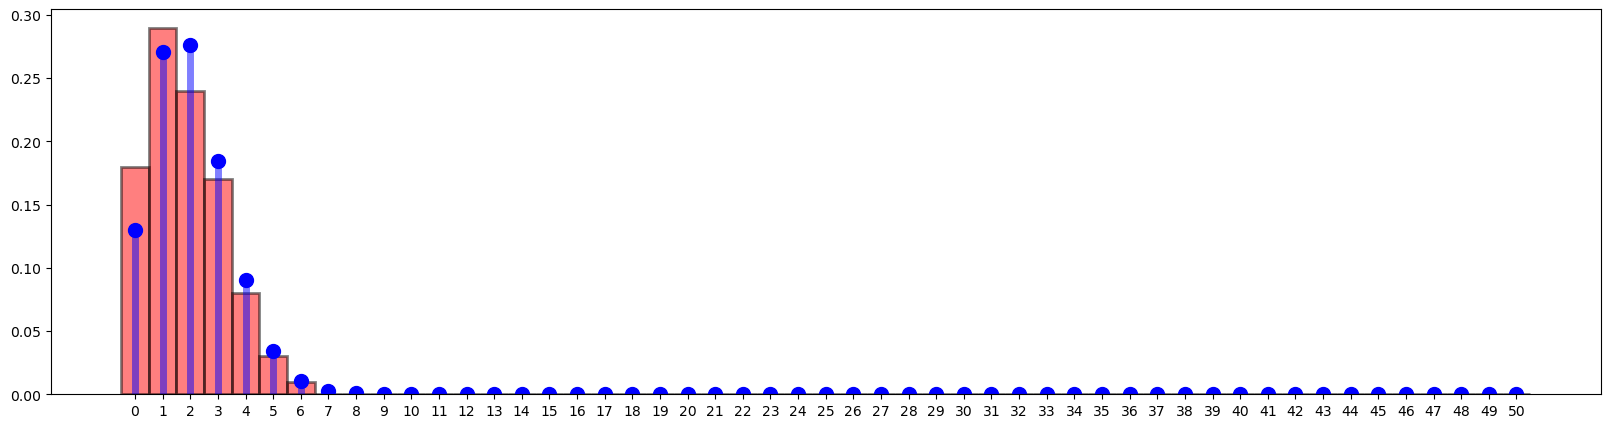

In [80]:
bins = np.arange(0, 50 + 1.5) - 0.5
fig = plt.figure(figsize=(20, 5))
plt.hist(
    Y.rvs(size=100),
    bins,
    density=True,
    color="red",
    alpha=0.5,
    edgecolor="black",
    linewidth=2,
)

plt.plot(y, f, "bo", ms=10)
plt.vlines(y, 0, f, colors="b", lw=5, alpha=0.5)
plt.xticks(y)
plt.show()


When we increase to 10000, the empirical starts to be closer to the true PMF.

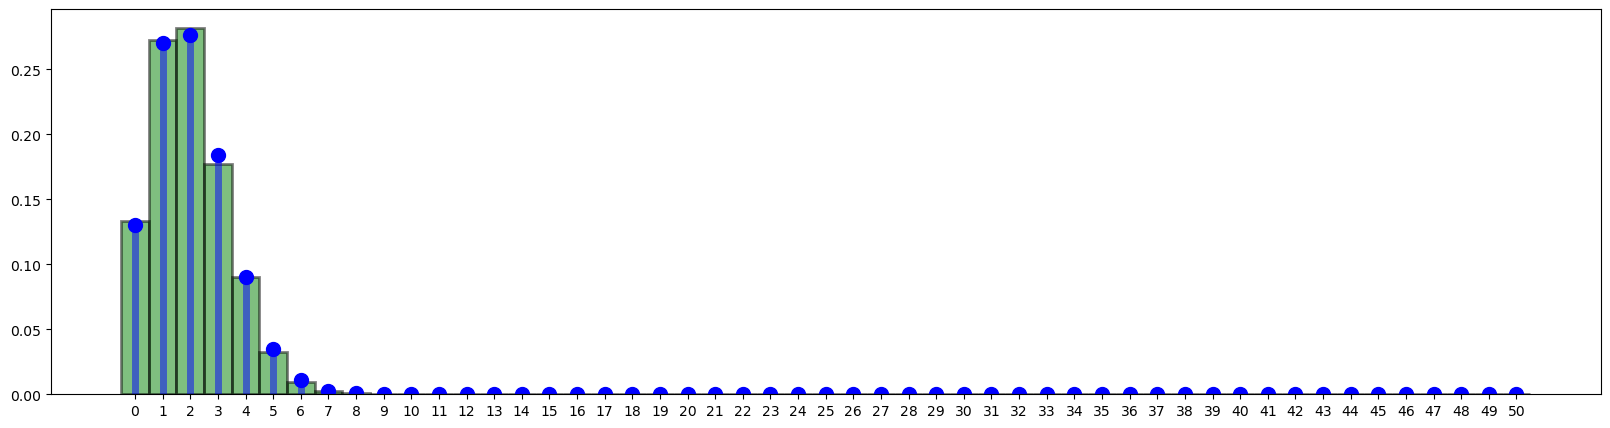

In [81]:
bins = np.arange(0, 50 + 1.5) - 0.5
fig = plt.figure(figsize=(20, 5))

plt.hist(
    Y.rvs(size=10000),
    bins,
    density=True,
    color="green",
    alpha=0.5,
    edgecolor="black",
    linewidth=2,
)

plt.plot(y, f, "bo", ms=10)
plt.vlines(y, 0, f, colors="b", lw=5, alpha=0.5)
plt.xticks(y)
plt.show()

### Alternative way to Calculate Expected Value of Revenue per Day

We already know in the long run the company does not earn profits by the law of average (expectation).

We can also calculate it by defining the total revenue as a random variable $Z = 90Y$ where $90$ refers
to the revenue earned per successful call conversion by an employee.

$$
\expectation \lsq Z \rsq = \expectation \lsq 90Y \rsq = 90 \expectation \lsq Y \rsq = 90 \times 2 = 180
$$

This means on **average**, the company earns revenue of 180 per day per employee. Thus if there's 100 employees,
then on **average**, the total revenue per day is $180 \times 100 = 18000$, which is the same as we got earlier.

And if we want to further calculate how much the company loses in 1 year, that will be

$$
365 \times (18000 - 20000) = 730000
$$

assuming everything else constant (no employees left etc).

We can also simulate 365 days using code below, we define `Z = 90 * Y.rvs(size = 100)`
to be the random variable $Z = 90Y$ (as there is no good way to just use `Z=90*Y`).

At each loop (day), we get a new draw random variable $Z$.

In [82]:
yearly_revenue = np.zeros(shape=365)
yearly_salary_paid = np.ones(shape=365) * 20000

for each_day in range(365):
    Z = 90 * Y.rvs(size = 100) # 100 employees' revenue [90, 180, 0, ...]
    daily_revenue = np.sum(Z)
    yearly_revenue[each_day] = daily_revenue

yearly_profits = yearly_revenue -  yearly_salary_paid

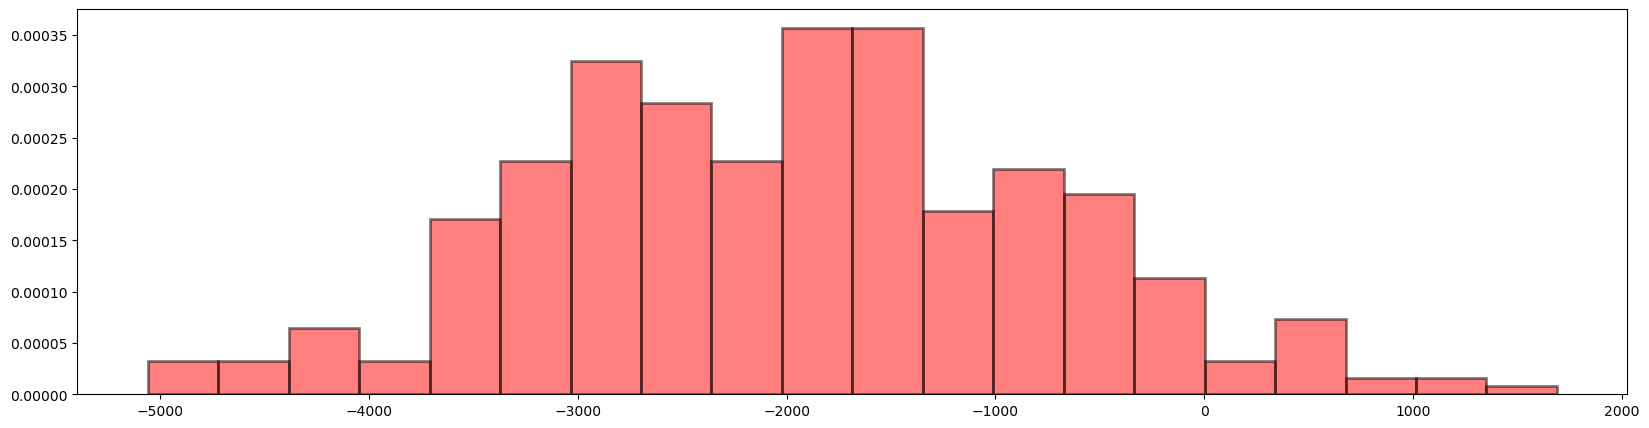

In [83]:
#bins = np.arange(0, yearly_revenue.max() + 1.5) - 0.5
fig = plt.figure(figsize=(20, 5))

plt.hist(
    yearly_profits,
    bins=20,
    density=True,
    color="red",
    alpha=0.5,
    edgecolor="black",
    linewidth=2,
)

# plt.plot(y, f, "bo", ms=10)
# plt.vlines(y, 0, f, colors="b", lw=5, alpha=0.5)
#plt.xticks(y)
plt.show()

If we increase $n$ or $p$, say just bump out both by a bit to $n=58$ and $p=0.06$, then we have



In [84]:
p = 0.06
n = 58

# our random variable Y
Y = stats.binom(n, p)

yearly_revenue = np.zeros(shape=365)
yearly_salary_paid = np.ones(shape=365) * 20000

for each_day in range(365):
    Z = 90 * Y.rvs(size = 100) # 100 employees' revenue [90, 180, 0, ...]
    daily_revenue = np.sum(Z)
    yearly_revenue[each_day] = daily_revenue

yearly_profits_improved = yearly_revenue -  yearly_salary_paid

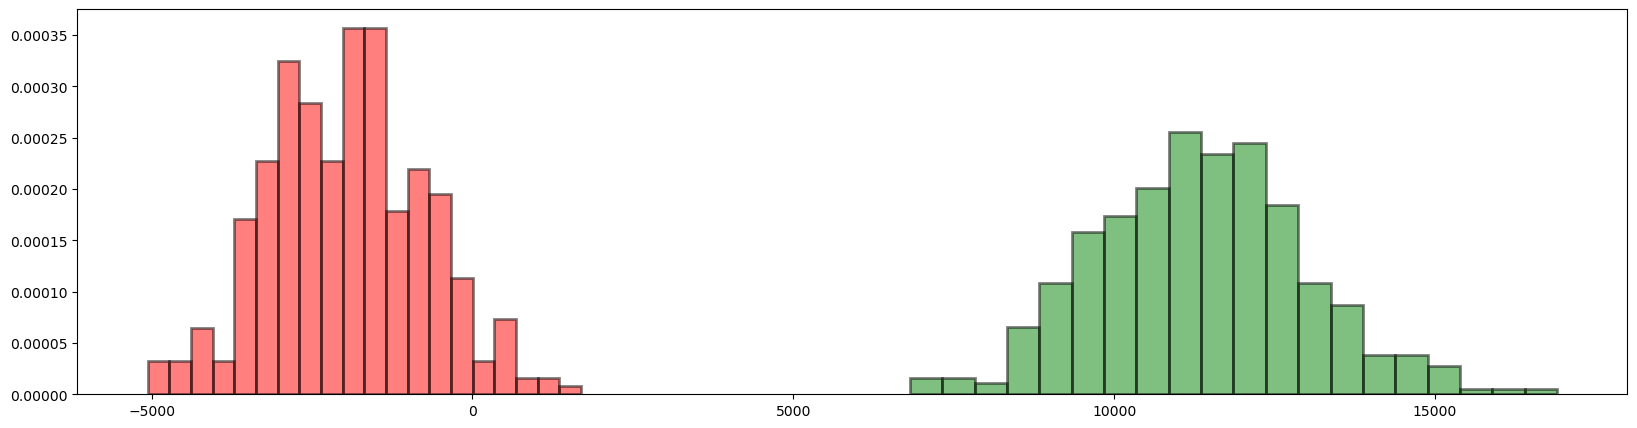

In [85]:
#bins = np.arange(0, yearly_revenue.max() + 1.5) - 0.5
fig = plt.figure(figsize=(20, 5))

plt.hist(
    yearly_profits,
    bins=20,
    density=True,
    color="red",
    alpha=0.5,
    edgecolor="black",
    linewidth=2,
)


plt.hist(
    yearly_profits_improved,
    bins=20,
    density=True,
    color="green",
    alpha=0.5,
    edgecolor="black",
    linewidth=2,
)

# plt.plot(y, f, "bo", ms=10)
# plt.vlines(y, 0, f, colors="b", lw=5, alpha=0.5)
#plt.xticks(y)
plt.show()

## Further Readings

- https://www.youtube.com/watch?v=qIzC1-9PwQo&list=PLvxOuBpazmsNIHP5cz37oOPZx0JKyNszN&index=4
- https://towardsdatascience.com/fun-with-the-binomial-distribution-96a5ecabf65b
- [Tim's reply on my confusion](https://stats.stackexchange.com/questions/593079/interpretation-of-bernoulli-and-binomial-random-variables-in-a-call-simulation-c).